# Initialisation


In [1]:
# IMPORTS
import numpy as np  # linear algebra

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [2]:
# Import DataSet ds and Models
from src.models import AnalysisModels as Models
from src.datasets import IMDBDataset

ds = IMDBDataset(config_path="./configs/datasets/imdb.yaml",
                 root="datasets/imdb")
print(
    ds.x_test.shape,
    ds.x_train.shape,
    ds.x_val.shape,
    ds.y_test.shape,
    ds.y_train.shape,
    ds.y_val.shape,
)
print(
    type(ds.x_test),
    type(ds.x_train),
    type(ds.x_val),
    type(ds.y_test),
    type(ds.y_train),
    type(ds.y_val),
)


models = Models(
    config_path="./configs/models/analysis-models.yaml",
    root="./models/analysis-models",
    download=True,
)
print(models)

loaded_plain_model_lr = models.lr.model

# Preprocess text

x_train = ds.x_train
x_test = ds.x_test

# Binarize y - Positive is 1
y_train = ds.y_train
y_test = ds.y_test


Creating dataset
Initializing objects
Encoding
Dataset created
(4999, 11612) (40000, 11612) (5000, 11612) (4999,) (40000,) (5000,)
<class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
A collection of pretrained sklearn models.
Contains the models ['knn', 'lr', 'rf', 'svm']


In [3]:
# Get indices in a score range
def classifier_fn_lr(x, negative_to_positive=0):
    """Returns the prediction probability of class 1 -> Not class 0"""
    # print('loaded_plain_model_svc.decision_function(x) - ', loaded_plain_model_svc.decision_function(x))
    prediction = loaded_plain_model_lr.predict_proba(x)
    # If prediction is [1] retrurn the probability of class 1 else return probability of class 0
    if negative_to_positive == 1:
        return prediction[:, 0]
    return prediction[:, 1]


indices_arr = []
for index in range(100):
    score = classifier_fn_lr(ds.x_train[index, :])[0]
    if score < 0.8 and score > 0.5:
        indices_arr.append(index)
        print(index, score)


14 0.7674097312963162
25 0.794254941226181
30 0.7952012833952921
62 0.7433974367346117
67 0.5388677044391137
71 0.5488086441178635
94 0.5288461971314911


# Analysis


In [ ]:
from src.analyzers import LRAnalyzer
%load_ext autoreload
%autoreload 2


explainer_lr = LRAnalyzer(
    "./models/analysis-models/lr.pkl",
    "./models/analysis-models/tfidf.pkl",
    threshold_classifier=0.49179999999978463,
    max_iter=50,
    time_maximum=120,
)

text = "One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side."
#text = "the movie was excellent, with fanstastic performance and gripping plot"
text = "bad movie"
explainer_lr(text, None)


In [ ]:
print(explainer_lr.explanation())

# Graphs


### New Method Graphs


In [4]:
# Get score arrays
from src.analyzers import LRAnalyzer
%load_ext autoreload
%autoreload 2

# Get graphs
indices = [6, 9, 10, 12, 18, 21, 24, 26, 38, 40, 41, 49, 52, 55, 59, 60]
indices = [6, 9, 10, 12, 18]
scores = []
lr_threshold = 0.49179999999978463

for index in indices:
    explainer_lr = LRAnalyzer(
        "./models/analysis-models/lr.pkl",
        "./models/analysis-models/tfidf.pkl",
        threshold_classifier=lr_threshold,
        max_iter=50,
        time_maximum=120,
    )
    explainer_lr(ds.x_test[index, :], None)
    scores.append(explainer_lr.get_scores())


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Start initialization...
initial sentence is ... 
(1, 11612)
['..10..', '..1997..', '..associate..', '..attempt..', '..barely..', '..buildup..', '..casino..', '..cocaine..', '..creative..', '..credible..', '..deal..', '..debt..', '..dont..', '..east..', '..enough..', '..entertain..', '..executive..', '..fact..', '..first..', '..florida..', '..forgot..', '..game..', '..go..', '..good..', '..inaccuracy..', '..interest..', '..la..', '..las..', '..life..', '..like..', '..list..', '..magical..', '..make..', '..michael..', '..movie..', '..never..', '..old..', '..one..', '..pat..', '..pay..', '..performance..', '..play..', '..plenty..', '..quality..', '..redeem..', '..right..', '..run..', '..send..', '..short..', '..snort..', '..spend..', '..star..', '..story..', '..straight..', '..tell..', '..thing..', '..time..', '..tournament..', '..vega..', '..vegas..', '..week..', '..without..']
score_predicted   [0.54

negative


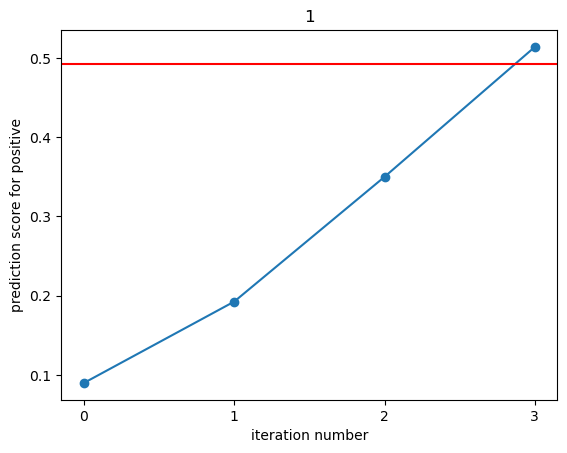

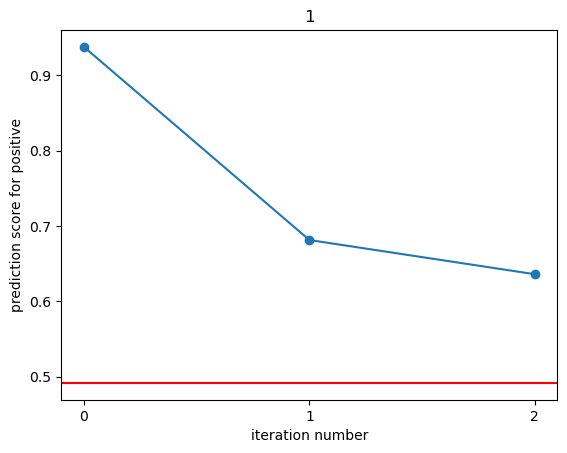

negative


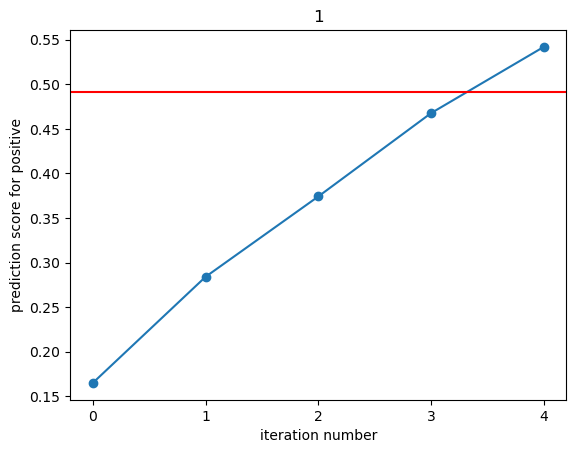

negative


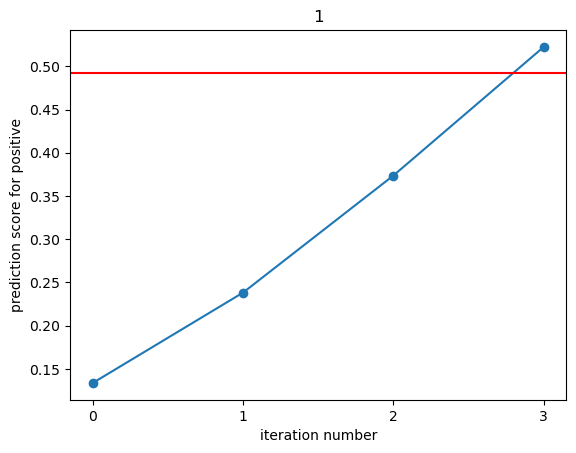

negative


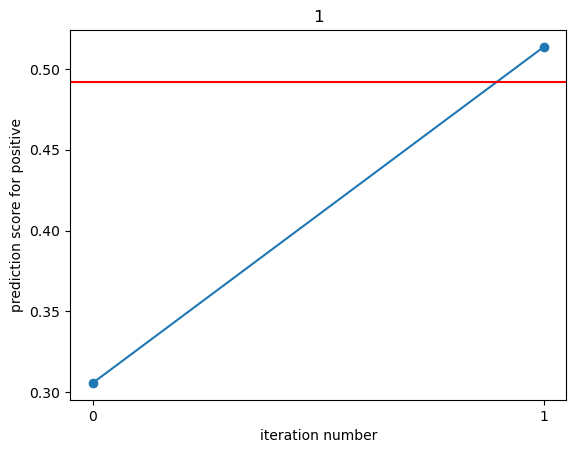

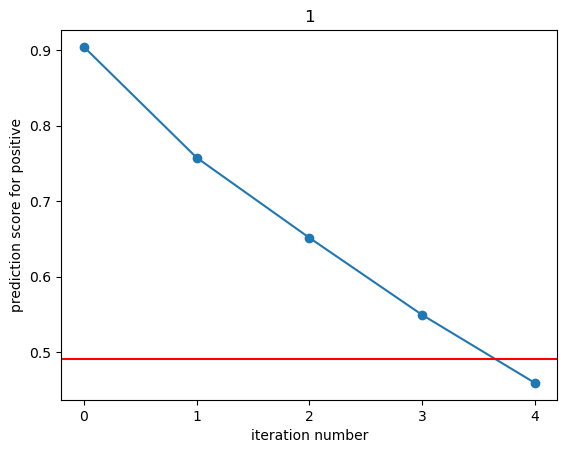

In [4]:
# Plot graphs
counter = 1
items = scores.copy()
for item in items:
    is_negative = False
    if item[0] < lr_threshold:
        print("negative")
        is_negative = True
        for i in range(len(item)):
            item[i] = 1 - item[i]
        item[0] = 1 - item[0]
        item[-1] = 1 - item[-1]
    data = item
    x = range(len(data))
    plt.plot(x, data, marker="o", linestyle="-")
    # draw a horizontal line at y = 0.499
    plt.axhline(y=lr_threshold, color="r", linestyle="-")

    plt.xticks(range(len(data)))

    # Add labels to the axes
    plt.xlabel("iteration number")
    plt.ylabel("prediction score for positive")

    # Add a title to the graph
    plt.title(str(counter))
    plt.show()
    # Show the plot

    plt.show()

### SEDC Method


In [5]:
# Get score arrays
from src.analyzers import SEDCAnalyzer
%load_ext autoreload
%autoreload 2

indices = [6, 9, 10, 12, 18, 21, 24, 26, 38, 40, 41, 49, 52, 55, 59, 60]
indices = [6, 9, 10, 12, 18]
scores_sedc = []
sedc_threshold = 0.49339999999983775

for index in indices:
    explainer_sedc = SEDCAnalyzer(
        "./models/analysis-models/lr.pkl",
        "./models/analysis-models/tfidf.pkl",
        threshold_classifier=sedc_threshold,
        max_iter=50,
        time_maximum=120,
    )
    explainer_sedc(ds.x_test[index, :], None)
    scores_sedc.append(explainer_sedc.get_scores())

# If an element is an array, convert it to float
for element in scores_sedc:
    for index in range(len(element)):
        if (not isinstance(element[index], float)):
            element[index] = element[index][0]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Start initialization...
Initialization is complete.

 Elapsed time 0 


 Iteration 1 

Stop iterations...

 Elapsed time 0 

Iterations are done.

 Total elapsed time 0 

Start initialization...
Initialization is complete.

 Elapsed time 0 


 Iteration 1 

While loop iteration 0

 Elapsed time 0 


 Iteration 2 

While loop iteration 0

 Elapsed time 0 


 Iteration 3 

While loop iteration 0

 Elapsed time 0 


 Iteration 4 

While loop iteration 0

 Elapsed time 0 


 Iteration 5 

While loop iteration 0

 Elapsed time 0 


 Iteration 6 

While loop iteration 0

 Elapsed time 0 


 Iteration 7 

While loop iteration 0

 Elapsed time 0 


 Iteration 8 

Stop iterations...

 Elapsed time 0 

Iterations are done.

 Total elapsed time 0 

Start initialization...
Initialization is complete.

 Elapsed time 0 


 Iteration 1 

While loop iteration 0

 Elapsed time 0 


 Iteration 2 

While loop iteratio

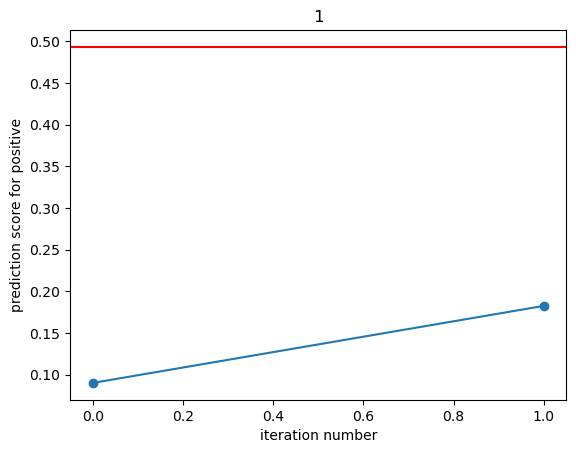

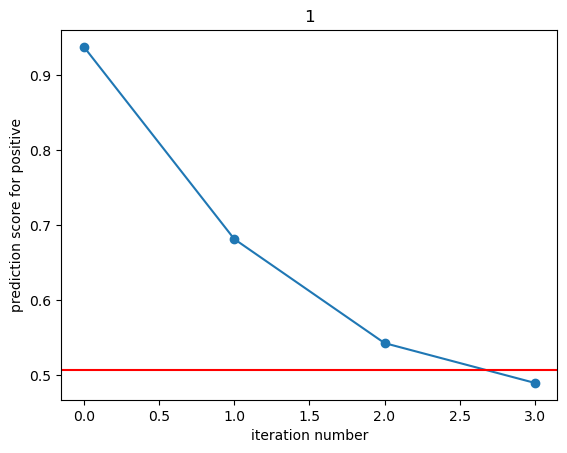

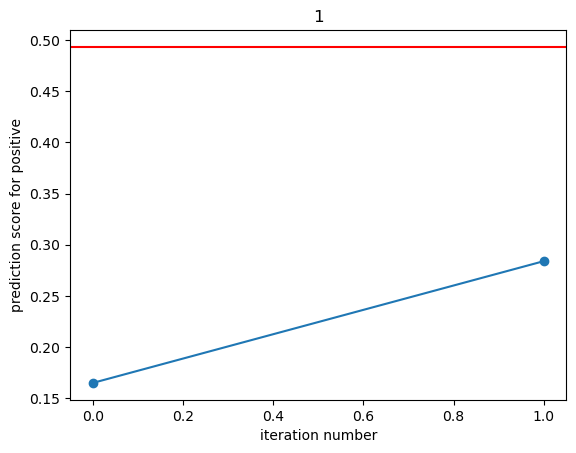

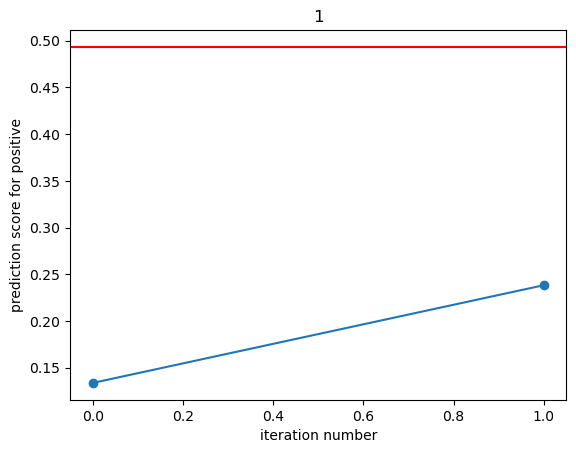

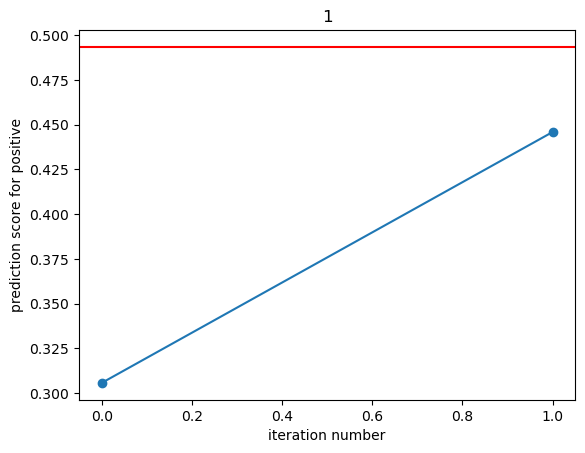

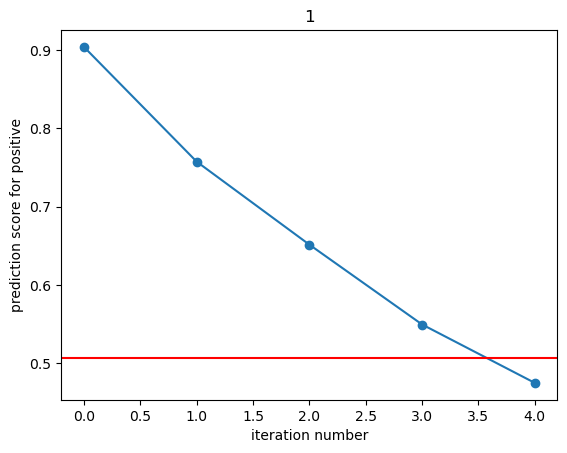

In [13]:
# Plot graphs
counter = 1
for item in scores_sedc:
    data = item
    x = range(len(data))
    plt.plot(x, data, marker="o", linestyle="-")
    # draw a horizontal line at y = 0.499
    if data[0] < sedc_threshold:
        plt.axhline(y=sedc_threshold, color="r", linestyle="-")
    else:
        plt.axhline(y=1 - sedc_threshold, color="r", linestyle="-")

    plt.xticks(range(len(data)))
    # Add labels to the axes
    plt.xlabel("iteration number")
    plt.ylabel("prediction score for positive")

    # Add a title to the graph
    plt.title(str(counter))
    plt.show()
    # Show the plot

    plt.show()

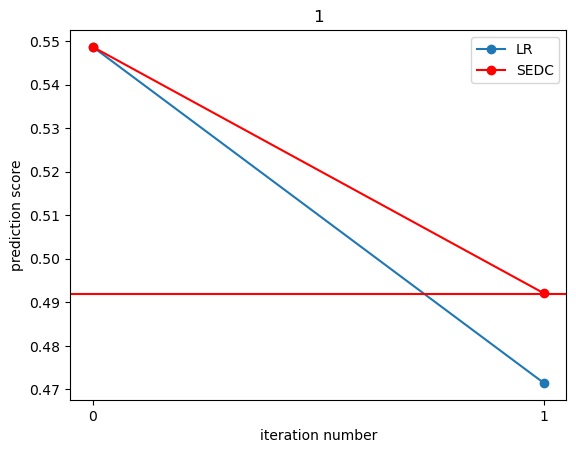

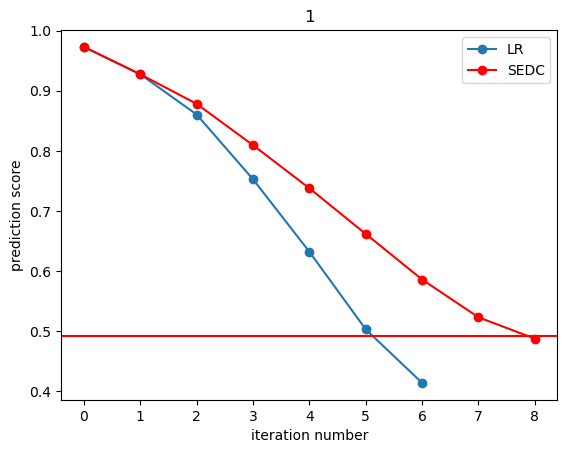

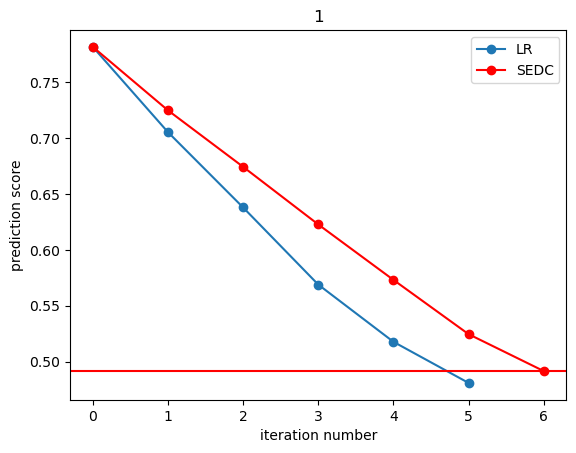

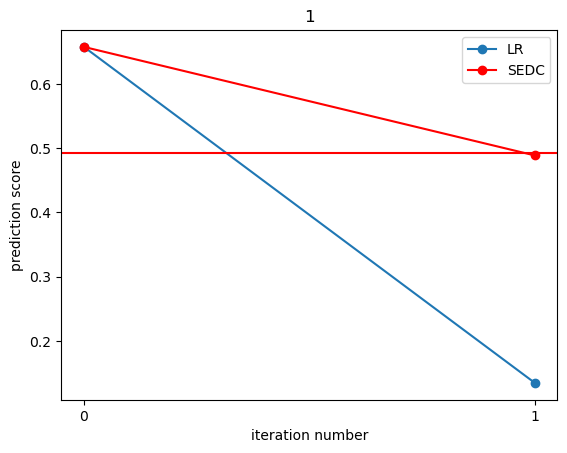

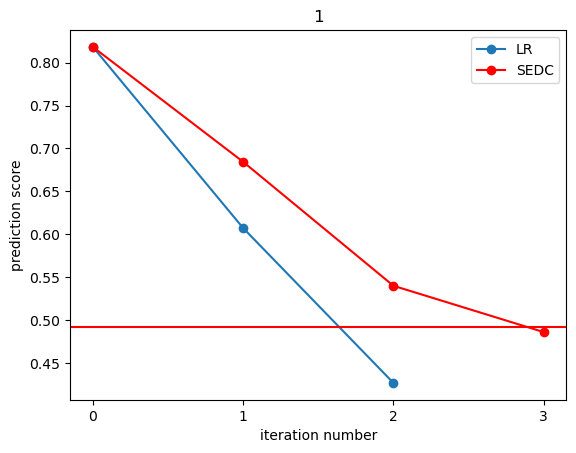

In [9]:
# Plot graphs
counter = 1
items = scores.copy()
sedc_items = scores_sedc.copy()
for item in range(len(items)):
    is_negative = False
    if items[item][0] < lr_threshold:
        print("negative")
        is_negative = True
        for i in range(len(items[item])):
            items[item][i] = 1 - items[item][i]
        items[item][0] = 1 - items[item][0]
        items[item][-1] = 1 - items[item][-1]
    data = items[item]
    sedc_data = sedc_items[item]
    x = range(len(data))
    sedc_x = range(len(sedc_data))
    plt.plot(x, data, marker="o", linestyle="-")
    plt.plot(sedc_x, sedc_data, marker="o", linestyle="-", color="r")
    # draw a horizontal line at y = 0.499
    plt.axhline(y=lr_threshold, color="r", linestyle="-")

    plt.legend(["LR", "SEDC"])

    plt.xticks(range(len(data)))
    plt.xticks(range(len(sedc_data)))

    # Add labels to the axes
    plt.xlabel("iteration number")
    plt.ylabel("prediction score")

    # Add a title to the graph
    plt.title(str(counter))
    plt.show()
    # Show the plot

    plt.show()


# Test Bench


In [ ]:
from src.test_bench import TestBench

configurations = [
    {
        "name": "Base config",
        "threshold_classifier": 0.49179999999978463,
        "max_iter": 50,
        "time_maximum": 120,
    }
]

tb = TestBench(
    model_path="./models/analysis-models/lr.pkl",
    vectorizer_path="./models/analysis-models/tfidf.pkl",
    analyzer_name="lr",
    threshold_classifier=0.49179999999978463,
    max_iter=50,
    time_maximum=120,
)

In [ ]:
# text = "One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side."
text = "eventhough action was okay, it was a bit dissappointing movie"
reports = tb(configurations, text, None)

In [ ]:
for report in reports:
    print(report)
    print()

In [ ]:
from src.datasets import IMDBDataset

ds = IMDBDataset(config_path="./configs/datasets/imdb.yaml", root="datasets/imdb")
tb.evaluate(ds.x_test, ds.y_test, save_dir="evaluations/lr")